Brownian model as defined for [stocks](https://en.wikipedia.org/wiki/Brownian_model_of_financial_markets#Stocks).
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/b471eaa8243f70f4681928500cd7653d54a99ea8)

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import priceanalytics.data as data

big_df = data.alpaca_download_single(
    'AAPL',     
    past_days=30, 
    interval=1    
)
dfs = data.split_alpaca_on_day(big_df)


## Modeling Returns and Volatility of `df`

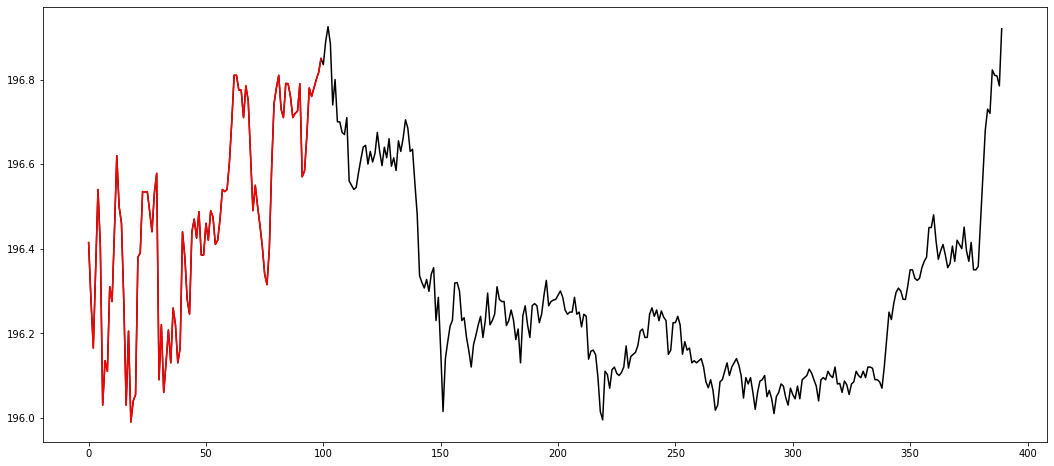

In [74]:
import priceanalytics.plot as plot
import matplotlib.pyplot as plt

with plot.MultiPlot(1, size=(18, 8)) as m:
    plt.plot(dfs[-1]['close'].to_numpy(), color='#000000')
    plt.plot(S, color='r')

# GBM Model
Geometric Brownian Motion

prices

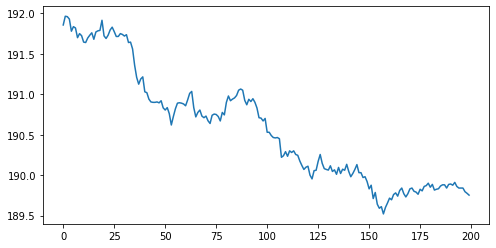

log_returns

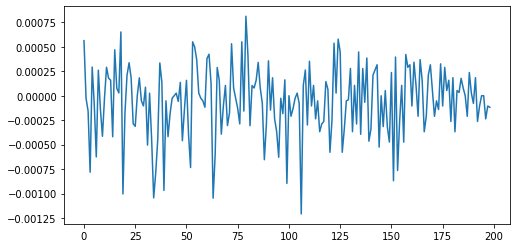

volatility

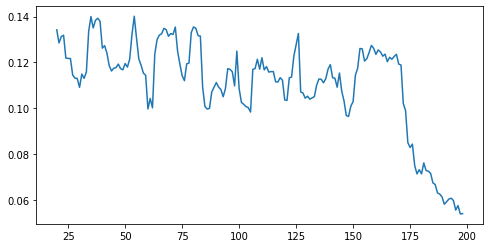

Stock price expected to change 5.13%


predictions

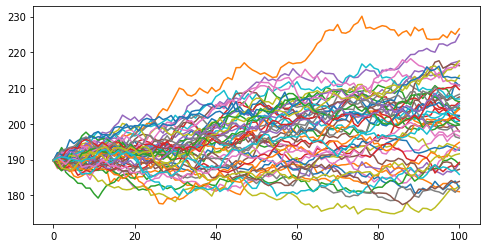

In [121]:
from IPython.display import display, Markdown, Latex

def gbm_model(df):
    s = (8,4)

    prices_series = df['close']
    log_returns = np.log(prices_series / prices_series.shift(1)).dropna()
    
    volatility = log_returns.rolling(window=21).std() * np.sqrt(252 * 60 * (12 - 8.5 + 3)) # this is wrong
        
    with plot.MultiPlot(1, size=s) as m:
        display(Markdown('prices'))
        plt.plot(prices_series.to_numpy())
    with plot.MultiPlot(1, size=s) as m:
        display(Markdown('log_returns'))
        plt.plot(log_returns.to_numpy())
    with plot.MultiPlot(1, size=s) as m:
        display(Markdown('volatility'))
        plt.plot(volatility.to_numpy())
    
    n_sim = 1000000
    
    S0 = prices_series[-1]
    n_S = len(prices_series)
    R = 0.05
    vol = volatility[-1]
    
    T = 1
    n_intervals = 100
    delta_t = T / n_intervals
    S_fwd = np.zeros((n_intervals + 1, n_sim))
    S_fwd[0] = S0
    
    for t in range(1, n_intervals + 1):
        exp_arg = (R - 0.5 * vol**2) * delta_t + vol * np.sqrt(delta_t) * np.random.standard_normal(n_sim)
        S_fwd[t] = S_fwd[t - 1] * np.exp(exp_arg)
        
    delta_price = np.mean(S_fwd[-1] - S0) / S0
    print('Stock price expected to change {:.2%}'.format(delta_price))
    
    with plot.MultiPlot(1, size=s) as m:
        display(Markdown('predictions'))
        plt.plot(S_fwd[:,0:50])
    

gbm_model(dfs[-15].iloc[:200])
